In [1027]:
# Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [1028]:
#Loading the data
df_train=pd.read_excel('C:/Users/Admin/Desktop/Saiprakash/DT/train_agriculture.xlsx')
df_train

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
4594,F00008078,2138,0,1,2,20,NaN,1,1,1
4595,F00008079,2139,0,1,2,30,47.0,2,1,1
4596,F00008080,2267,0,1,2,10,7.0,27,2,0
4597,F00008082,2267,0,1,2,10,20.0,24,2,0


# DATASET DESCRIPTION

ID==>UniqueID

Estimated_Insects_Count==>Estimated Insects Count per square meter

Crop_Type==>Category of Crop(0,1)

Soil_Type==>Category of Soil(0,1)

Pesticide_Use_Category==>Types of Pesticide uses(1-Never, 2-Previously Used 3-Currently Using)

Number_Doses_Week==>Number of doses per week

Number_Weeks_Used==>Number of weeks used

Number_Weeks_Quit==>Number of weeks quit

Season==>Season Category(1,2,3)

Crop_Damage==>Crop Damage Category(0=alive,1=Damage to other causes,2=Damage due to Pesticides)



In [1029]:
#Checking for shape of the both the datasets(ie.,number of rows and columns of the train and test datasets.)
print(df_train.shape, '\t\t', df_test.shape)

(4599, 10) 		 (1186, 8)


Observations :
    
  There are 4599 rows and 10 columns present in the train dataset and 1199 rows and 9 columns in the test dataset.

In [1030]:
#Checking the columns of train dataset
df_train.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [1031]:
#The columns in train dataset is same as test dataset.So,no need to check the datatypes of test dataset
#Checking the data types of each column
print(df_train.dtypes)

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object


==>Majority of the columns are of int datatype.

==>Only ID is of object type and Number_Weeks_Used is of float type

In [1032]:
#Checking the information of the dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4157 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 359.4+ KB


In [1033]:
df_train.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

There are 442 null values in the dataset.So,let's remove them in EDA.

In [1034]:
#ID is not important.so we drop ID column
df = df_train.drop('ID',axis = 1)
df

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...
4594,2138,0,1,2,20,NaN,1,1,1
4595,2139,0,1,2,30,47.0,2,1,1
4596,2267,0,1,2,10,7.0,27,2,0
4597,2267,0,1,2,10,20.0,24,2,0


ID  column is dropped now.

In [1035]:
df_train =df

# Summary Statistics

In [1036]:
df_train.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4157.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.891027,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,12.586005,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,38.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


Observations :

    ==>Estimated_Insects_Count has the highest statistical count
    
    ==>The minimum value is 0 for Crop_Type,Soil_Type,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit.
    
    ==>The difference between 75 % and max value is more.So,outliers may present.

# Exploratory Data Analysis on Train Dataset

# Checking for Missing Values

In [1037]:
#Checking the null values
df_train.isnull().sum()

Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

There are 442 missing values in Number_Weeks_Used.So,we remove them by imputing it with mean

In [1038]:
df_train['Number_Weeks_Used'] = df_train['Number_Weeks_Used'].fillna(df_train['Number_Weeks_Used'].mean())

In [1039]:
#Checking the null values again if any
df_train.isnull().sum()

Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

Now,there are no missing values.

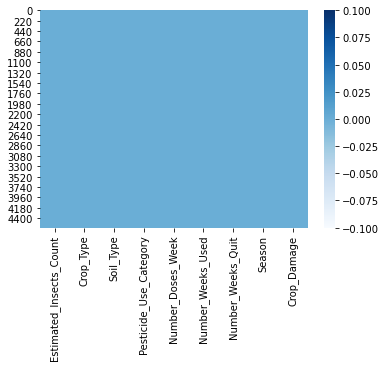

In [1040]:
# Visualizing the null values using heatmap
sns.heatmap(df_train.isnull(),cmap = 'Blues')

From the heatmap,it is clear that there are no missing values in the train dataset.

# To check the Correlation

In [1041]:
df_train.corr()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.036911,-0.151796,-0.027111,-0.122509,0.427904,0.246719,-0.009482,0.202312
Crop_Type,-0.036911,1.000000,-0.175019,0.349662,-0.163832,-0.002128,-0.273475,-0.000549,0.021772
Soil_Type,-0.151796,-0.175019,1.000000,0.021661,0.050099,-0.093539,-0.034355,0.011052,-0.059481
Pesticide_Use_Category,-0.027111,0.349662,0.021661,1.000000,-0.005985,0.368106,-0.569467,0.008487,0.199195
Number_Doses_Week,-0.122509,-0.163832,0.050099,-0.005985,1.000000,0.099705,-0.032381,-0.003768,-0.018363
Number_Weeks_Used,0.427904,-0.002128,-0.093539,0.368106,0.099705,1.000000,-0.446200,-0.010590,0.231925
Number_Weeks_Quit,0.246719,-0.273475,-0.034355,-0.569467,-0.032381,-0.446200,1.000000,0.004861,-0.152918
Season,-0.009482,-0.000549,0.011052,0.008487,-0.003768,-0.010590,0.004861,1.000000,-0.016196
Crop_Damage,0.202312,0.021772,-0.059481,0.199195,-0.018363,0.231925,-0.152918,-0.016196,1.000000


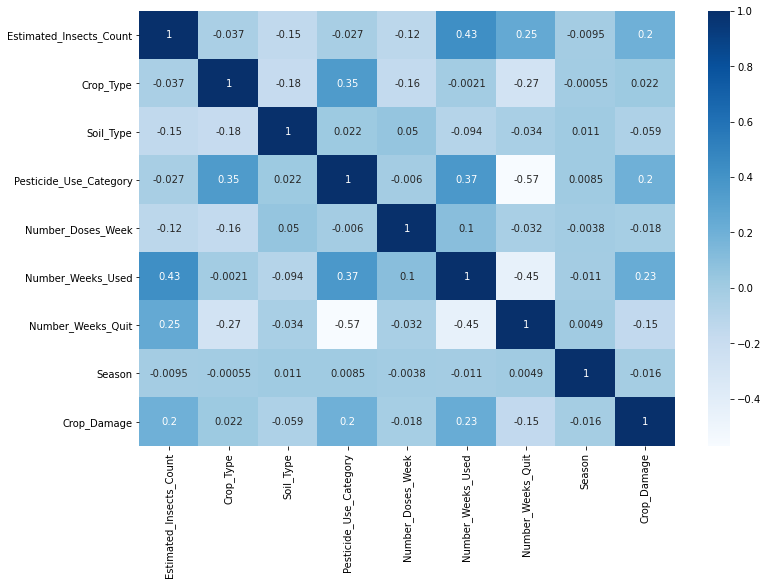

In [1042]:
#visualizing correlation using heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df_train.corr(),cmap='Blues',annot = True)

Observations :

==> Number_Weeks_Used is highly correlated with Estimated_Insects_Count

==> Number_Weeks_Quit is least correlated with Pesticide_Use_Category

# Data Visualization

# Univariate Analysis

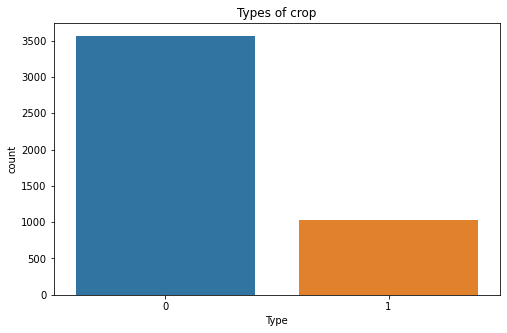



Crop_Type count :
0    3565
1    1034
Name: Crop_Type, dtype: int64


In [1043]:
# checking the Crop_Type count
plt.figure(figsize=[8,5])
sns.countplot(x = 'Crop_Type', data = df_train)
plt.title('Types of crop')
plt.xlabel('Type')
plt.ylabel('count')
plt.show()

print('\n')
print('Crop_Type count :')
print(df_train['Crop_Type'].value_counts())

Observations :
    
    There are two types of crop in the dataset namely 1,2.
    
    Crop 0 has the highest count.

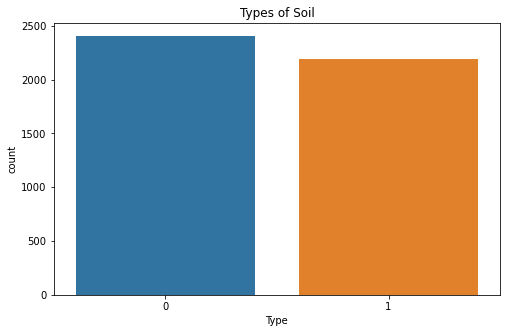



Soil_Type count :
0    2407
1    2192
Name: Soil_Type, dtype: int64


In [1044]:
# checking the Soil_Type count
plt.figure(figsize=[8,5])
sns.countplot(x = 'Soil_Type', data = df_train)
plt.title('Types of Soil')
plt.xlabel('Type')
plt.ylabel('count')
plt.show()

print('\n')
print('Soil_Type count :')
print(df_train['Soil_Type'].value_counts())

Observations :
    
    There are two types of soil in the dataset namely 1,2.
    
     Type 0 has the highest count.

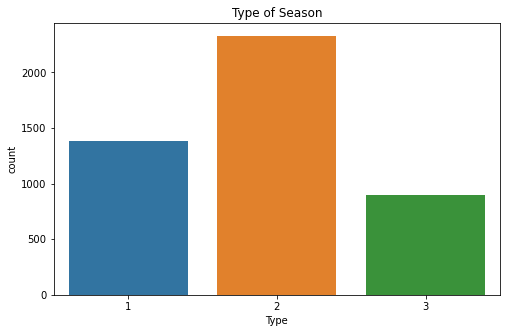



Season :
2    2327
1    1379
3     893
Name: Season, dtype: int64


In [1045]:
# checking the Season count
plt.figure(figsize=[8,5])
sns.countplot(x = 'Season', data = df_train)
plt.title('Type of Season')
plt.xlabel('Type')
plt.ylabel('count')
plt.show()

print('\n')
print('Season :')
print(df_train['Season'].value_counts())

Observations :
    
    There are three crop seasons in the dataset namely 1,2,3 and the highest crops planted is in Season 2.

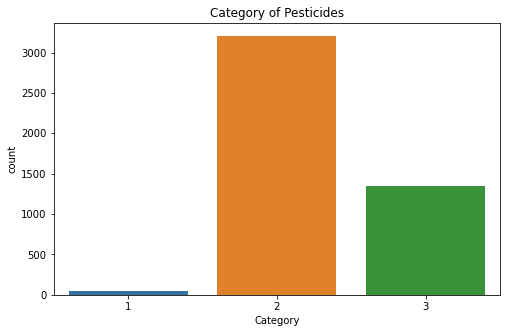



Pesticide_Use_Category :
2    3205
3    1349
1      45
Name: Pesticide_Use_Category, dtype: int64


In [1046]:
# checking the Pesticide_Use_Category count
plt.figure(figsize=[8,5])
sns.countplot(x = 'Pesticide_Use_Category', data = df_train)
plt.title('Category of Pesticides')
plt.xlabel('Category')
plt.ylabel('count')
plt.show()

print('\n')
print('Pesticide_Use_Category :')
print(df_train['Pesticide_Use_Category'].value_counts())

Observations :

There are three categories of pesticides in the dataset namely 1,2,3.Category 2 pesticide is used more.

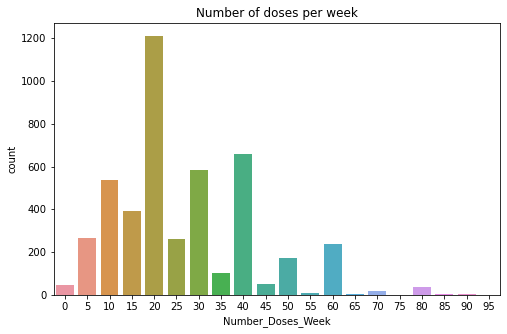



Number_Doses_Week :
20    1211
40     657
30     584
10     537
15     393
5      268
25     263
60     237
50     172
35     101
45      53
0       45
80      36
70      17
55      11
90       5
85       4
65       3
75       1
95       1
Name: Number_Doses_Week, dtype: int64


In [1047]:
# checking the Number_Doses_Week count
plt.figure(figsize=[8,5])
sns.countplot(x = 'Number_Doses_Week', data = df_train)
plt.title('Number of doses per week')
plt.xlabel('Number_Doses_Week')
plt.ylabel('count')
plt.show()

print('\n')
print('Number_Doses_Week :')
print(df_train['Number_Doses_Week'].value_counts())

Observations:
    
    Week 20 has the highest Number_Doses_Week that is 1211 doses.Therfore,we can say that at in the first quarter the usage of doses are high.
    Week 75 & 95 has 1 dose per week which is the least.

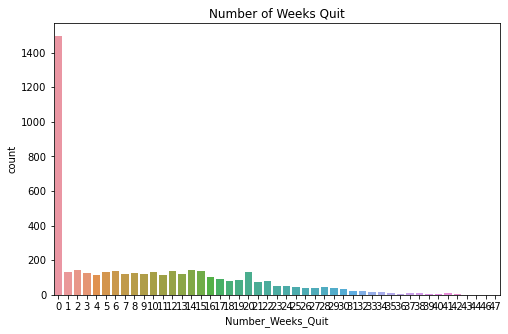



Number_Weeks_Quit :
0     1496
14     146
2      145
6      140
12     137
15     136
10     134
5      134
1      133
20     131
8      125
3      124
13     123
7      122
9      118
4      117
11     116
16     105
17      94
19      87
18      83
22      83
21      74
23      54
24      52
25      48
28      46
29      41
26      41
27      37
30      34
31      25
32      21
33      16
34      16
35      11
37      11
41       9
38       9
36       8
40       4
39       3
42       3
44       2
43       2
47       2
46       1
Name: Number_Weeks_Quit, dtype: int64


In [1048]:
# checking the Number_Weeks_Quit count
plt.figure(figsize=[8,5])
sns.countplot(x = 'Number_Weeks_Quit', data = df_train)
plt.title('Number of Weeks Quit')
plt.xlabel('Number_Weeks_Quit')
plt.ylabel('count')
plt.show()

print('\n')
print('Number_Weeks_Quit :')
print(df_train['Number_Weeks_Quit'].value_counts())

Observations:
    
    week 0 has more Number_Weeks_Quit.So,we can say that majority of the farmers not used doses for crop in the first week.

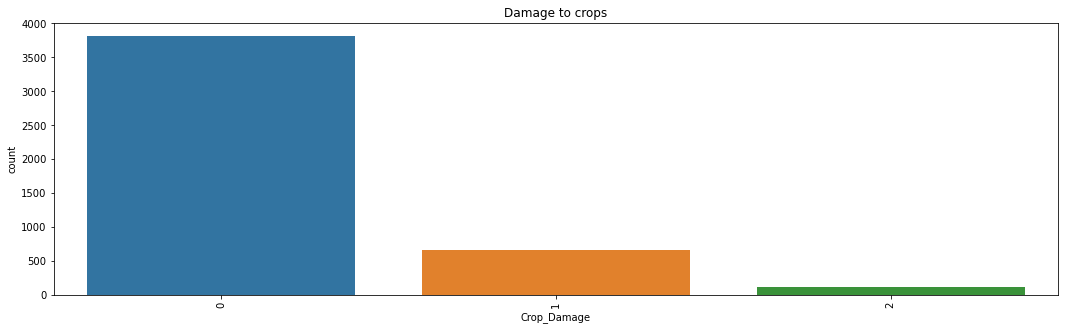



Crop_Damage :
0    3820
1     664
2     115
Name: Crop_Damage, dtype: int64


In [1049]:
# checking the Crop_Damage count
plt.figure(figsize=[18,5])
sns.countplot(x = 'Crop_Damage', data = df_train)
plt.title('Damage to crops')
plt.xlabel('Crop_Damage')
plt.ylabel('count')
plt.xticks(rotation = 90)
plt.show()

print('\n')
print('Crop_Damage :')
print(df_train['Crop_Damage'].value_counts())

Observations :
Crop damage 0 has more count which means alive crops are more and crop damage 2 which is due to pesticides has the least.

# Bivariate Analysis

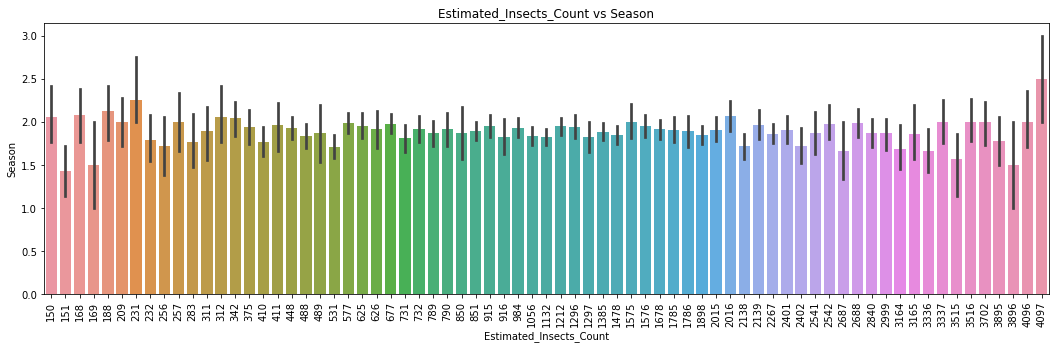

Estimated_Insects_Count  Season
150                      2         10
                         3          4
                         1          3
151                      1          4
                         2          3
                                   ..
4096                     2          8
                         1          3
                         3          3
4097                     2          1
                         3          1
Name: Season, Length: 207, dtype: int64


In [1050]:
plt.figure(figsize=[18,5])
sns.barplot(x=df_train['Estimated_Insects_Count'],y=df_train['Season'],data=df_train)
plt.title('Estimated_Insects_Count vs Season')
plt.xlabel('Estimated_Insects_Count')
plt.ylabel('Season')
plt.xticks(rotation = 90)
plt.show()

print(df_train.groupby('Estimated_Insects_Count')['Season'].value_counts())

Observations :
    
  The insects will be more between season 2 & 3 and the least between 1 & 2.So,we can say that crops should be planted between 1 & 2 for better productivity.

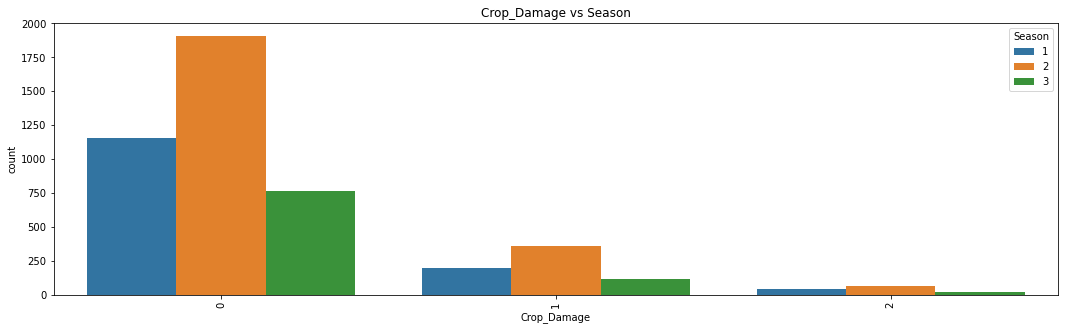

Crop_Damage  Season
0            2         1908
             1         1150
             3          762
1            2          358
             1          192
             3          114
2            2           61
             1           37
             3           17
Name: Season, dtype: int64


In [1051]:
plt.figure(figsize=[18,5])
sns.countplot(x='Crop_Damage',hue='Season',data=df_train)
plt.title('Crop_Damage vs Season')
plt.xlabel('Crop_Damage')
plt.xticks(rotation = 90)
plt.show()

print(df_train.groupby('Crop_Damage')['Season'].value_counts())

Observations :
    
    Alive Crops are more in season 2,whereas season 3 has the least.
    Season 2 yields better  because crop damage is less.

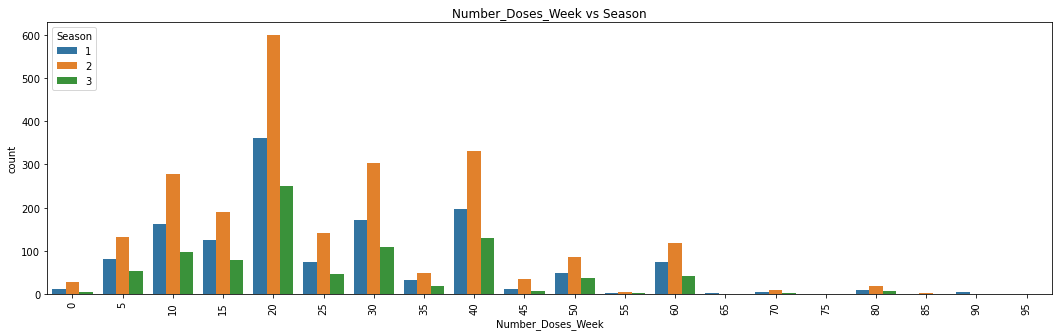

Number_Doses_Week  Season
0                  2          28
                   1          11
                   3           6
5                  2         132
                   1          82
                   3          54
10                 2         277
                   1         163
                   3          97
15                 2         189
                   1         125
                   3          79
20                 2         599
                   1         361
                   3         251
25                 2         141
                   1          75
                   3          47
30                 2         303
                   1         172
                   3         109
35                 2          48
                   1          33
                   3          20
40                 2         331
                   1         197
                   3         129
45                 2          34
                   1          11
                 

In [1052]:
plt.figure(figsize=[18,5])
sns.countplot(x='Number_Doses_Week',hue='Season',data=df_train)
plt.title('Number_Doses_Week vs Season')
plt.xlabel('Number_Doses_Week')
plt.xticks(rotation = 90)
plt.show()

print(df_train.groupby('Number_Doses_Week')['Season'].value_counts())

Observations :
    20 doses per week is the highest and is used in season 2 because of more insects in season 2.

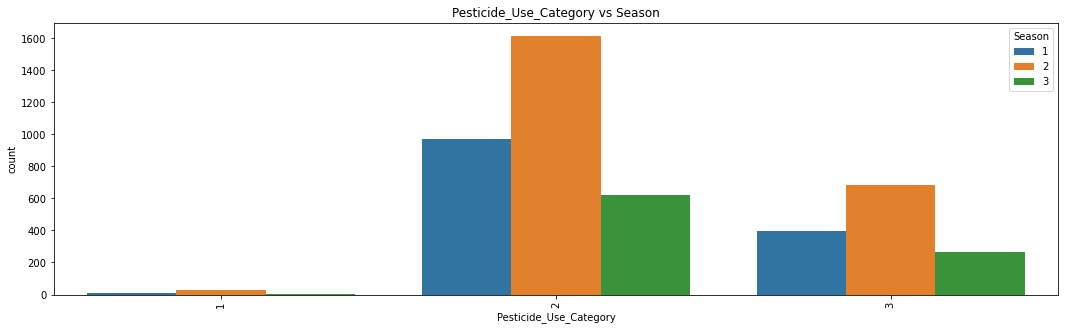

Pesticide_Use_Category  Season
1                       2           28
                        1           11
                        3            6
2                       2         1616
                        1          970
                        3          619
3                       2          683
                        1          398
                        3          268
Name: Season, dtype: int64


In [1053]:
plt.figure(figsize=[18,5])
sns.countplot(x='Pesticide_Use_Category',hue='Season',data=df_train)
plt.title('Pesticide_Use_Category vs Season')
plt.xlabel('Pesticide_Use_Category')
plt.xticks(rotation = 90)
plt.show()

print(df_train.groupby('Pesticide_Use_Category')['Season'].value_counts())

Observations :

    Pesticide Category 2(previously used) is used more in all the seasons and is highly used in season 2.
    
    Never used pesticides are less.

# Multivariate Analysis

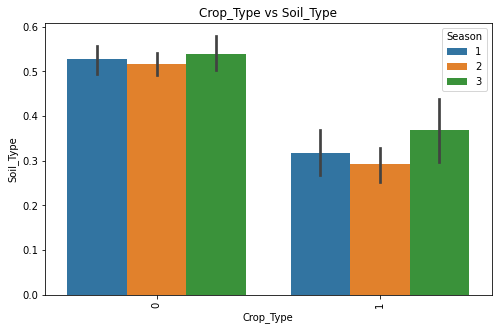

In [1054]:
plt.figure(figsize=[8,5])
sns.barplot(x="Crop_Type", y="Soil_Type", hue = 'Season',data=df_train)
plt.title('Crop_Type vs Soil_Type')
plt.xlabel('Crop_Type')
plt.ylabel('Soil_Type')
plt.xticks(rotation = 90)
plt.show()

Crop type 0 has the soil type of 0.5 which yields high productivity.

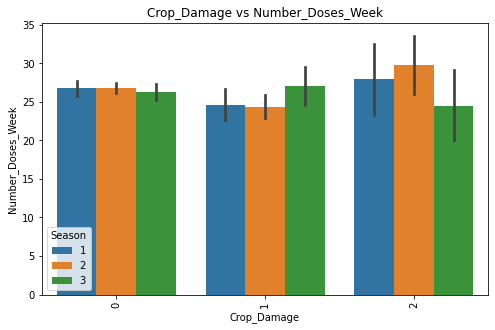

In [1055]:
plt.figure(figsize=[8,5])
sns.barplot(x="Crop_Damage", y="Number_Doses_Week", hue = 'Season',data=df_train)
plt.title('Crop_Damage vs Number_Doses_Week')
plt.xlabel('Crop_Damage')
plt.ylabel('Number_Doses_Week')
plt.xticks(rotation = 90)
plt.show()

Observation :
    Crop damage due to other causes used less doses in season 1 & 2 whereas alive crops used approximately equal in all the seasons

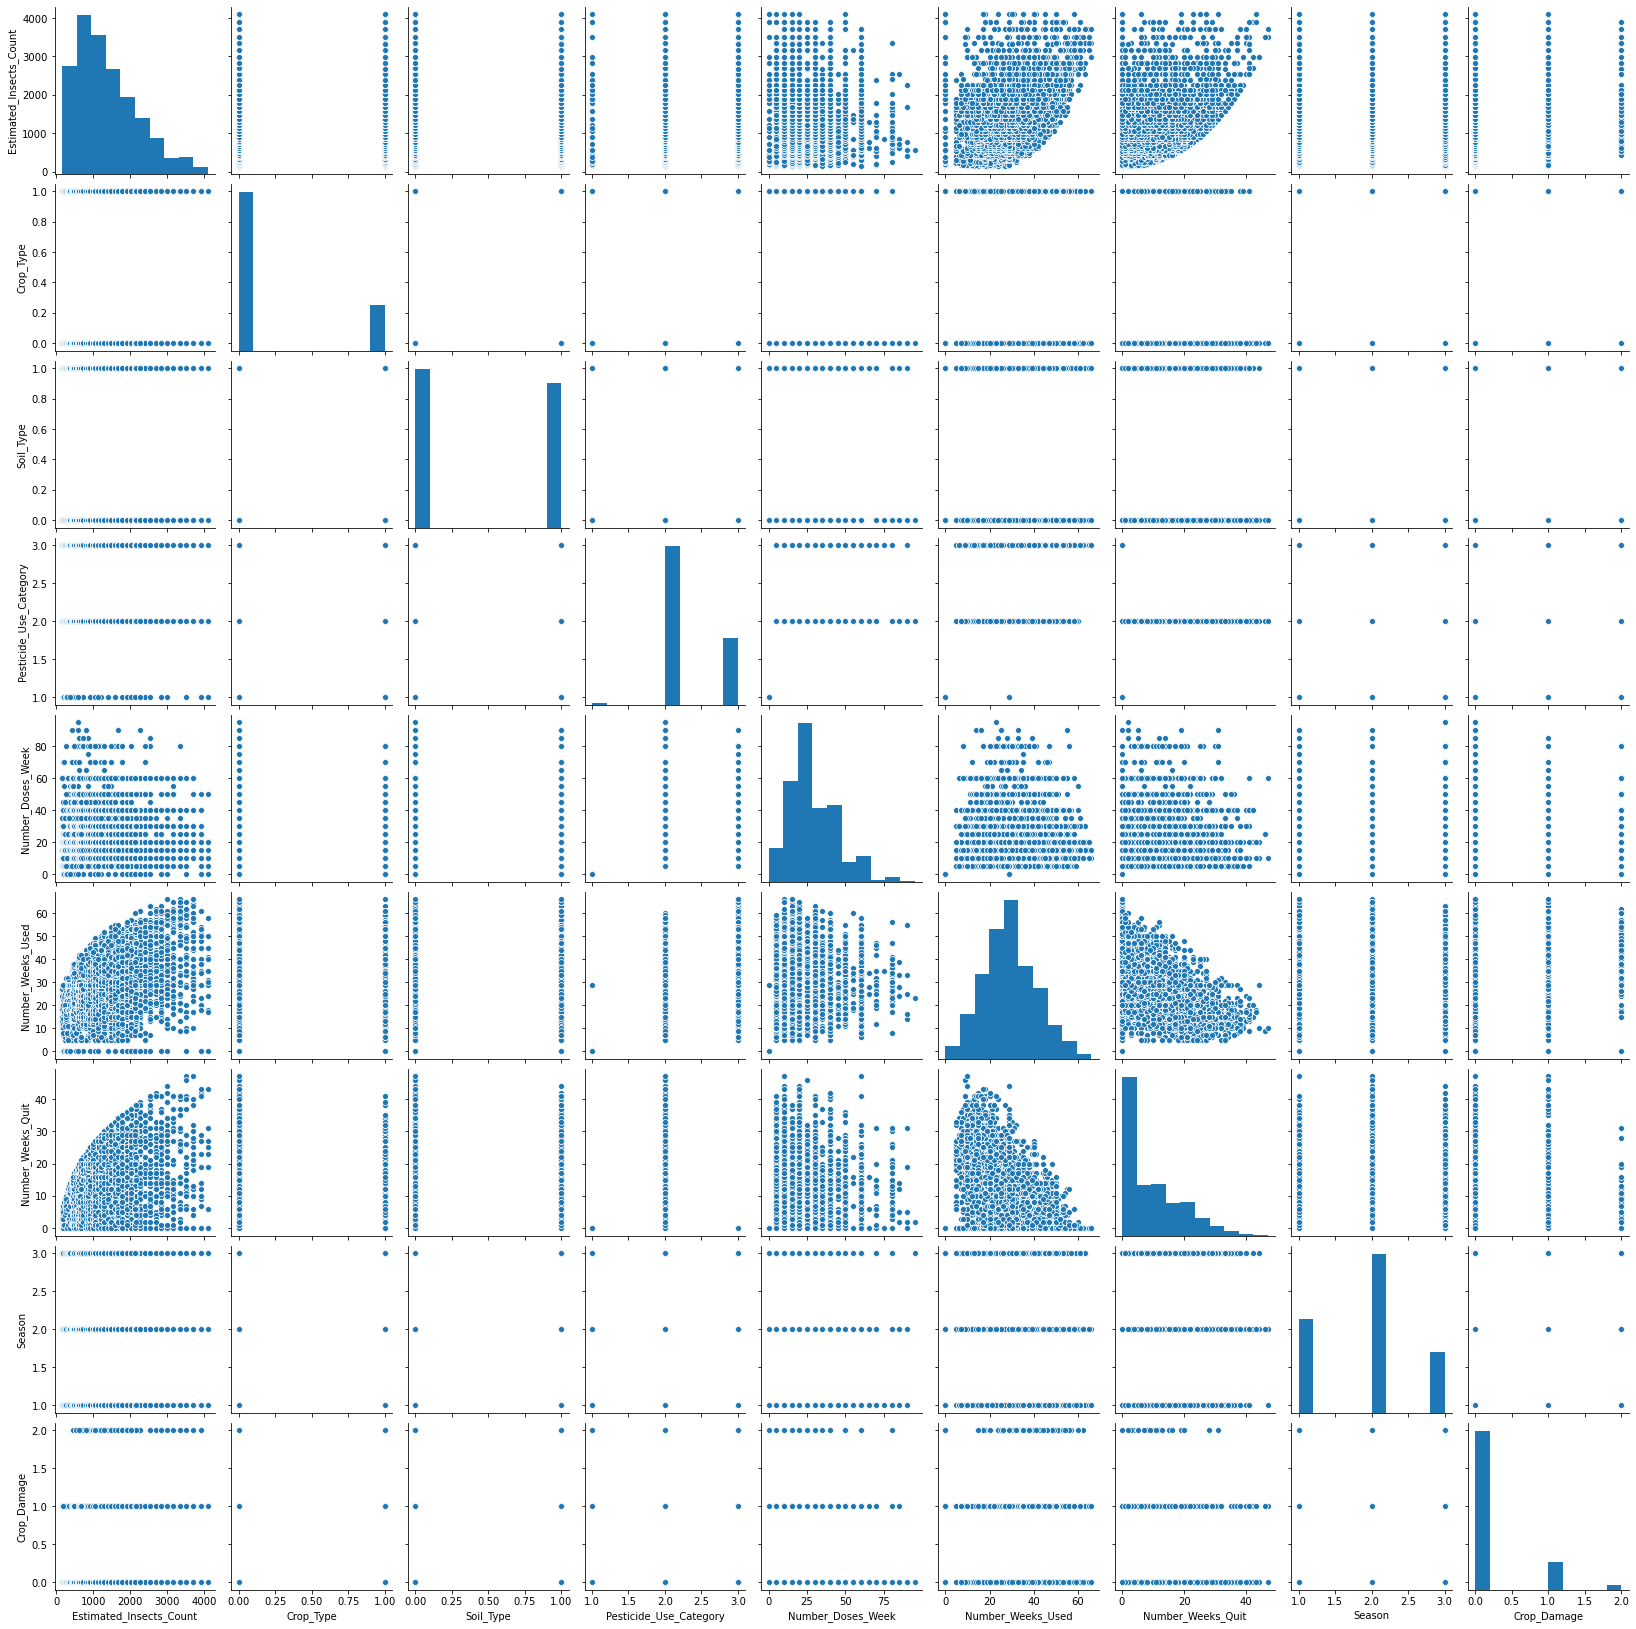

In [1056]:
sns.pairplot(df_train)

observation :
    
    
    The above pair plot shows different plots of each column.

# To check the distribution of skewness

In [1057]:
df_train.skew()

Estimated_Insects_Count    0.911469
Crop_Type                  1.318693
Soil_Type                  0.093631
Pesticide_Use_Category     0.678586
Number_Doses_Week          0.945895
Number_Weeks_Used          0.278664
Number_Weeks_Quit          0.919771
Season                     0.144841
Crop_Damage                2.306933
dtype: float64

In [1058]:
df_train.skew()
for col in df_train.skew().index:
    if col in df_train.describe().columns:
        if df_train[col].skew()>1:
            df_train[col]=np.sqrt(df_train[col])

In [1059]:
df_train.skew()

Estimated_Insects_Count    0.911469
Crop_Type                  1.318693
Soil_Type                  0.093631
Pesticide_Use_Category     0.678586
Number_Doses_Week          0.945895
Number_Weeks_Used          0.278664
Number_Weeks_Quit          0.919771
Season                     0.144841
Crop_Damage                1.868685
dtype: float64

# Plotting Outliers

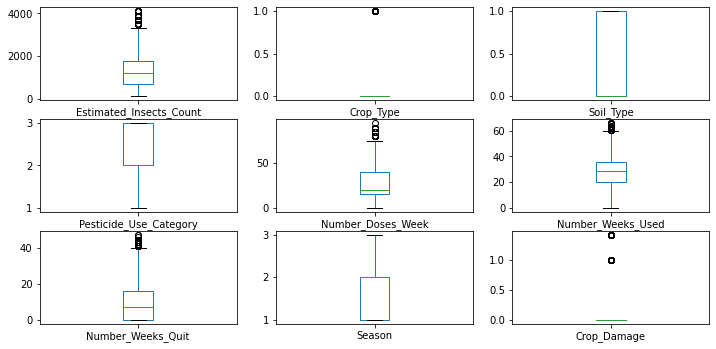

In [1060]:
df_train.plot(kind='box', subplots=True, layout=(6,3), figsize=(12,12))
plt.show()

Outliers are present.

# Removing Outliers

In [1061]:
from scipy.stats import zscore
z = np.abs(zscore(df_train))
z

array([[1.44286807, 1.85681868, 0.95429408, ..., 0.94782668, 1.28702725,
        0.44645909],
       [1.41708065, 1.85681868, 0.95429408, ..., 0.94782668, 0.15207762,
        2.03742611],
       [1.35813798, 1.85681868, 0.95429408, ..., 0.94782668, 0.15207762,
        2.03742611],
       ...,
       [1.11008649, 0.53855555, 1.04789501, ..., 1.83218282, 0.15207762,
        0.44645909],
       [1.11008649, 0.53855555, 1.04789501, ..., 1.52329287, 0.15207762,
        0.44645909],
       [1.11008649, 0.53855555, 1.04789501, ..., 0.80254967, 0.15207762,
        0.44645909]])

In [1062]:
threshold = 3
print(np.where(z>3))

(array([   7,    9,   14,   22,   23,  100,  103,  112,  149,  165,  166,
        167,  179,  185,  186,  197,  207,  222,  223,  242,  248,  252,
        264,  265,  290,  296,  305,  316,  325,  346,  351,  355,  361,
        374,  375,  377,  384,  453,  458,  466,  480,  510,  517,  522,
        557,  595,  612,  634,  693,  702,  703,  704,  705,  706,  807,
        819,  855,  856,  911,  944,  978,  980,  998, 1017, 1019, 1067,
       1097, 1178, 1212, 1291, 1307, 1324, 1326, 1327, 1329, 1337, 1339,
       1340, 1341, 1342, 1343, 1344, 1345, 1346, 1347, 1347, 1348, 1349,
       1406, 1443, 1457, 1489, 1523, 1589, 1652, 1654, 1737, 1807, 1868,
       2019, 2043, 2090, 2136, 2139, 2140, 2165, 2170, 2171, 2174, 2183,
       2185, 2188, 2190, 2190, 2191, 2192, 2193, 2194, 2237, 2392, 2553,
       2565, 2585, 2589, 2590, 2590, 2591, 2615, 2663, 2671, 2696, 2702,
       2710, 2714, 2716, 2723, 2767, 2779, 2792, 2796, 2797, 2804, 2806,
       2814, 2828, 2829, 2834, 2841, 2842, 2851, 2

In [1063]:
df_train_new=df_train[(z<3).all(axis=1)]

In [1064]:
print(df_train.shape,'\t',df_train_new.shape)

(4599, 9) 	 (4370, 9)


In [1065]:
df_train = df_train_new
print(df_train.shape)

(4370, 9)


4559 rows ha reduced to 4370 rows.So,outliers are removed from the train dataset.

In [1066]:
df_train['Crop_Damage'].value_counts()

0.0    3731
1.0     639
Name: Crop_Damage, dtype: int64

Most of the outliers in crop damage are from category 2.Now,outliers are removed.So,crop damage has only two categories namely 1 & 2.

# Model Training

In [1067]:
#Seperating into input and output variables
x = df_train.drop(['Crop_Damage'], axis=1)
y = df_train['Crop_Damage']

In [1068]:
x.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,188,1.0,0,1,0,0.0,0,1
1,209,1.0,0,1,0,0.0,0,2
2,257,1.0,0,1,0,0.0,0,2
3,257,1.0,1,1,0,0.0,0,2
4,342,1.0,0,1,0,0.0,0,2


In [1069]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [1070]:
#Breaking our input and target variable into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [1071]:
print(x_train.shape,'\t',x_test.shape)

print(y_train.shape,'\t',y_test.shape)

(3496, 8) 	 (874, 8)
(3496,) 	 (874,)


In [1072]:
#Importing all the model library

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier

#importing error metrics

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV,cross_val_score

# Finding the best parameters

In [1073]:
#using GridsearchCV to find the best parameter in DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV
from scipy.stats import entropy

tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
clf = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5)
clf.fit(x, y)
print(clf.best_params_)

{'criterion': 'entropy', 'max_depth': 4}


In [1074]:
#using GridsearchCV to find the best parameter in KNeighborsClassifier

from sklearn.model_selection import GridSearchCV
from scipy.stats import entropy
knn = KNeighborsClassifier()
parameters = {'n_neighbors':range(22,25)}
clf = GridSearchCV(knn,parameters)
clf.fit(x, y)
print(clf.best_params_)

{'n_neighbors': 22}


In [1075]:
dtc = DecisionTreeClassifier(criterion = 'entropy',max_depth = 4)
knn = KNeighborsClassifier(n_neighbors=22)

In [1076]:
#checking all algorithms using for loop: 

model = [GaussianNB(),knn,dtc,SVC(),SGDClassifier()] 

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('==============================================================================================')
    print('\n')

Accuracy score of GaussianNB() is:
0.8226544622425629
[[684  66]
 [ 89  35]]
              precision    recall  f1-score   support

         0.0       0.88      0.91      0.90       750
         1.0       0.35      0.28      0.31       124

    accuracy                           0.82       874
   macro avg       0.62      0.60      0.60       874
weighted avg       0.81      0.82      0.81       874



Accuracy score of KNeighborsClassifier(n_neighbors=22) is:
0.8592677345537757
[[737  13]
 [110  14]]
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92       750
         1.0       0.52      0.11      0.19       124

    accuracy                           0.86       874
   macro avg       0.69      0.55      0.55       874
weighted avg       0.82      0.86      0.82       874



Accuracy score of DecisionTreeClassifier(criterion='entropy', max_depth=4) is:
0.8455377574370709
[[718  32]
 [103  21]]
              precision    recall  f1-score

SGDClassifier has better accuracy score comparing with other models.Let's also check cross validation.

In [1077]:
#cross validate the models
models=[GaussianNB(),KNeighborsClassifier(),SVC(),DecisionTreeClassifier(),SGDClassifier()] 
for m in models:
    score = cross_val_score(m,x,y,cv=4,scoring='accuracy')
    print('Model',m)
    print('Score:',score)
    print('Mean Score:',score.mean())
    print('Standard deviation:',score.std())
    print('==========================================================')
    print('\n')

Model GaussianNB()
Score: [0.76029277 0.8673376  0.63003663 0.8507326 ]
Mean Score: 0.7770999014708987
Standard deviation: 0.09417364621339414


Model KNeighborsClassifier()
Score: [0.80695334 0.84354986 0.7985348  0.84432234]
Mean Score: 0.8233400862632336
Standard deviation: 0.020811763442869453


Model SVC()
Score: [0.85910339 0.85269899 0.83424908 0.85347985]
Mean Score: 0.8498828291257385
Standard deviation: 0.009358178232356257


Model DecisionTreeClassifier()
Score: [0.74016468 0.74016468 0.73351648 0.75732601]
Mean Score: 0.7427929648881159
Standard deviation: 0.008818703791678404


Model SGDClassifier()
Score: [0.85361391 0.85361391 0.85347985 0.85347985]
Mean Score: 0.8535468800793595
Standard deviation: 6.702659950602596e-05




# Using Ensemble Techniques to Boostup our Accuracy

In [1078]:
#Importing all the model library
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier,ExtraTreesClassifier


#checking all algorithms using for loop: 
model = [RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('==============================================================================================')
    print('\n')

Accuracy score of RandomForestClassifier() is:
0.8443935926773455
[[715  35]
 [101  23]]
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91       750
         1.0       0.40      0.19      0.25       124

    accuracy                           0.84       874
   macro avg       0.64      0.57      0.58       874
weighted avg       0.81      0.84      0.82       874



Accuracy score of AdaBoostClassifier() is:
0.8443935926773455
[[722  28]
 [108  16]]
              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91       750
         1.0       0.36      0.13      0.19       124

    accuracy                           0.84       874
   macro avg       0.62      0.55      0.55       874
weighted avg       0.80      0.84      0.81       874



Accuracy score of GradientBoostingClassifier() is:
0.8558352402745996
[[729  21]
 [105  19]]
              precision    recall  f1-score   support

         0.0       0

GradientBoostingClassifier has better accuracy than other results.

In [1079]:
#Using GradientBoostingClassifier model with best results
gbc=GradientBoostingClassifier(learning_rate=0.1,random_state=59,n_estimators=20)
gbc.fit(x_train,y_train)
gbc.score(x_train,y_train)
predgbc=gbc.predict(x_test)
print('\n')

print(accuracy_score(y_test,predgbc))
print(confusion_matrix(y_test,predgbc))
print(classification_report(y_test,predgbc))



0.8627002288329519
[[749   1]
 [119   5]]
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.93       750
         1.0       0.83      0.04      0.08       124

    accuracy                           0.86       874
   macro avg       0.85      0.52      0.50       874
weighted avg       0.86      0.86      0.81       874



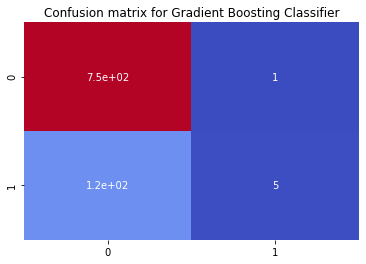

In [1080]:
#Plotting confusion matrix for Gradient Boosting Classifier
cm = confusion_matrix(y_test,predgbc)
sns.heatmap(cm,annot=True,cbar=False,cmap='coolwarm')

plt.title('Confusion matrix for Gradient Boosting Classifier')
plt.show()

# AUC ROC CURVE

In [1081]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
gbc=GradientBoostingClassifier

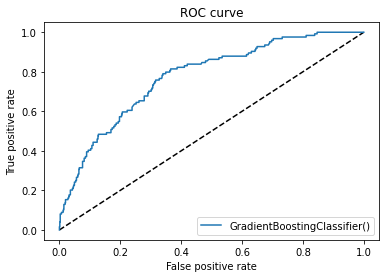

0.5194946236559139


In [1082]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
y_pred_prob=gbc.predict_proba(x_test)[:,1]
y_pred_prob

fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='GradientBoostingClassifier()')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

auc_score = roc_auc_score(y_test,predgbc)
print(auc_score)

GradientBoostingClassifier is performing good.

# Saving the best model in a pickle file

In [1083]:
#importing joblib
import joblib

gbc=GradientBoostingClassifier()
#saving the model in a pickle file
joblib.dump(gbc,'Agriculture.pkl')

['Agriculture.pkl']

# Test Dataset

In [1084]:
#Loading the data
df_test = pd.read_excel('C:/Users/Admin/Desktop/Saiprakash/DT/test_agriculture.xlsx')
df_test

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1
...,...,...,...,...,...,...,...,...,...
1194,F00003133,1132,0,1,2,40,34.0,7,3
1195,F00003135,1132,0,1,2,40,25.0,3,1
1196,F00003138,1132,0,1,2,20,13.0,23,1
1197,F00003149,1212,0,1,2,10,35.0,5,1


In [1085]:
#Checking the columns of test dataset
df_test.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season'],
      dtype='object')

In [1086]:
#Checking for shape
df_test.shape

(1199, 9)

There are 1199 rows and 9 columns in the test dataset

# Summary Statistics

In [1087]:
df_test.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
count,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1080.000000,1199.000000,1199.000000
mean,1288.737281,0.194329,0.455379,2.383653,26.555463,29.033333,7.052544,1.881568
std,845.004912,0.395848,0.498213,0.522866,16.154101,12.782083,8.863634,0.685640
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,677.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000
50%,1056.000000,0.000000,0.000000,2.000000,20.000000,28.000000,3.000000,2.000000
75%,1785.000000,0.000000,1.000000,3.000000,40.000000,38.000000,13.000000,2.000000
max,4097.000000,1.000000,1.000000,3.000000,90.000000,64.000000,42.000000,3.000000


Observations :

==>Estimated_Insects_Count has the highest statistical count

==>The minimum value is 0 for Crop_Type,Soil_Type,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit.

==>The difference between 75 % and max value is more.So,outliers may present.

# Exploratory Data Analysis on Test Dataset

# Checking for Missing Values

In [1088]:
#ID is not important.so we drop ID column
df = df_test.drop('ID',axis = 1)

In [1089]:
df_test = df

In [1090]:
#Checking the null values again
df_test.isnull().sum()

Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

There are 119 missing values in Number_Weeks_Used.So,we remove them by imputing it with mean

In [1091]:
df_test['Number_Weeks_Used'] = df_test['Number_Weeks_Used'].fillna(df_test['Number_Weeks_Used'].mean())

In [1092]:
#Checking the null values again if any
df_test.isnull().sum()

Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
dtype: int64

There are no null values in the test dataset.

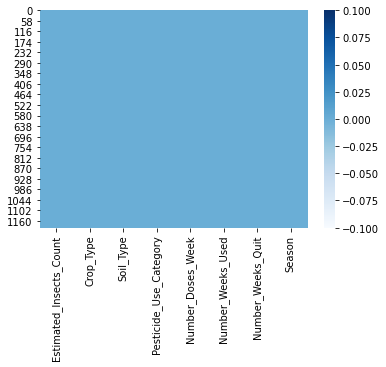

In [1093]:
# Visualizing the null values using heatmap
sns.heatmap(df_test.isnull(),cmap = 'Blues')

From the heatmap,it is clear that there are no null values.

# To check the Correlation

In [1094]:
df_test.corr()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
Estimated_Insects_Count,1.000000,0.020773,-0.339516,0.038259,-0.121168,0.491944,0.146441,0.023384
Crop_Type,0.020773,1.000000,0.063050,0.482378,-0.170014,0.062412,-0.390935,0.020282
Soil_Type,-0.339516,0.063050,1.000000,0.129857,0.057118,-0.139741,-0.191989,-0.069242
Pesticide_Use_Category,0.038259,0.482378,0.129857,1.000000,-0.010922,0.406020,-0.584312,0.015085
Number_Doses_Week,-0.121168,-0.170014,0.057118,-0.010922,1.000000,0.122996,0.009077,0.027197
Number_Weeks_Used,0.491944,0.062412,-0.139741,0.406020,0.122996,1.000000,-0.362582,0.018306
Number_Weeks_Quit,0.146441,-0.390935,-0.191989,-0.584312,0.009077,-0.362582,1.000000,0.030281
Season,0.023384,0.020282,-0.069242,0.015085,0.027197,0.018306,0.030281,1.000000


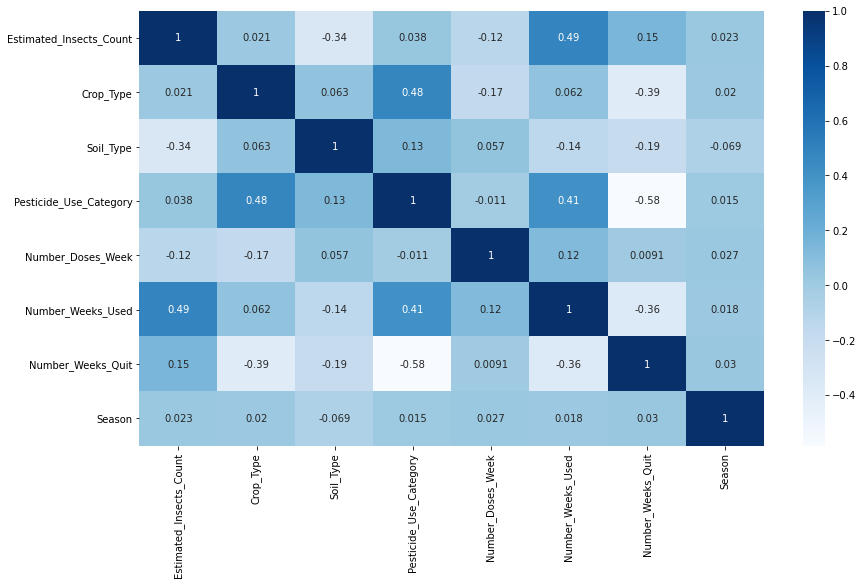

In [1095]:
#visualizing correlation using heatmap
plt.figure(figsize=(14,8))
sns.heatmap(df_test.corr(),annot = True,cmap='Blues')

Observations :

==> Number_Weeks_Used is highly correlated with Estimated_Insects_Count

==> Number_Weeks_Quit is least correlated with Pesticide_Use_Category

# To check the distribution of skewness

In [1096]:
df_test.skew()

Estimated_Insects_Count    1.098665
Crop_Type                  1.546968
Soil_Type                  0.179422
Pesticide_Use_Category     0.089675
Number_Doses_Week          0.872028
Number_Weeks_Used          0.220343
Number_Weeks_Quit          1.191013
Season                     0.155872
dtype: float64

In [1097]:
df_test.skew()
for col in df_test.skew().index:
    if col in df_test.describe().columns:
        if df_test[col].skew()>1:
            df_test[col]=np.sqrt(df_test[col])

In [1098]:
df_test.skew()

Estimated_Insects_Count    0.481273
Crop_Type                  1.546968
Soil_Type                  0.179422
Pesticide_Use_Category     0.089675
Number_Doses_Week          0.872028
Number_Weeks_Used          0.220343
Number_Weeks_Quit          0.391417
Season                     0.155872
dtype: float64

# Plotting Outliers

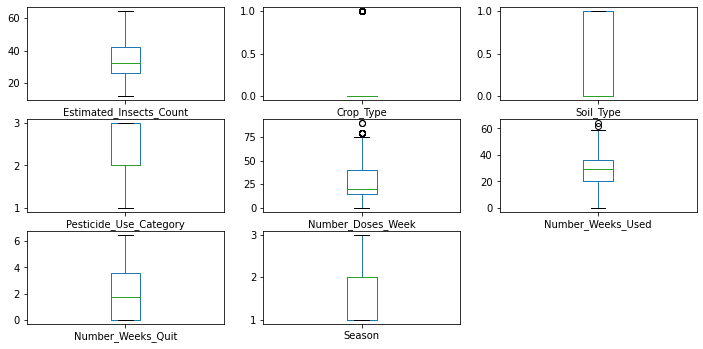

In [1099]:
df_test.plot(kind='box', subplots=True, layout=(6,3), figsize=(12,12))
plt.show()

There are outliers in the test dataset.

# Removing Outliers

In [1100]:
from scipy.stats import zscore
z = np.abs(zscore(df_test))
z

array([[1.80235633e+00, 2.03615391e+00, 1.09360445e+00, ...,
        5.85986262e-16, 9.74395945e-01, 1.72804130e-01],
       [1.22375672e+00, 2.03615391e+00, 1.09360445e+00, ...,
        2.39438582e+00, 9.74395945e-01, 1.72804130e-01],
       [8.01430546e-01, 2.03615391e+00, 9.14407397e-01, ...,
        2.39438582e+00, 9.74395945e-01, 1.72804130e-01],
       ...,
       [3.80170774e-02, 4.91122009e-01, 1.09360445e+00, ...,
        1.32227276e+00, 1.54703332e+00, 1.28629553e+00],
       [6.54135842e-02, 4.91122009e-01, 1.09360445e+00, ...,
        4.92072401e-01, 2.01226513e-01, 1.28629553e+00],
       [6.54135842e-02, 4.91122009e-01, 1.09360445e+00, ...,
        5.85986262e-16, 1.37684897e+00, 1.63190379e+00]])

In [1101]:
threshold = 3
print(np.where(z>3))

(array([  50,   83,  129,  136,  179,  255,  535,  574,  613,  630,  751,
       1030, 1152], dtype=int64), array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int64))


In [1102]:
df_test_new=df_test[(z<3).all(axis=1)]

In [1103]:
print(df_test.shape,'\t',df_test_new.shape)

(1199, 8) 	 (1186, 8)


1199 rows has reduced to 1186 rows.So,outliers are removed.

In [1104]:
df_test = df_test_new
print(df_test.shape)

(1186, 8)


In [1105]:
#Seperating into input and output variables
x_predict = df_train.drop(['Crop_Damage'], axis=1)
y_predict = df_train['Crop_Damage']

In [1106]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_predict_predict = sc.fit_transform(x_predict)

In [1107]:
#using GridsearchCV to find the best parameter in DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV
from scipy.stats import entropy

tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
clf = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5)
clf.fit(x_predict, y_predict)
print(clf.best_params_)

{'criterion': 'entropy', 'max_depth': 4}


In [1108]:
#using GridsearchCV to find the best parameter in KNeighborsClassifier

from sklearn.model_selection import GridSearchCV
from scipy.stats import entropy
knn = KNeighborsClassifier()
parameters = {'n_neighbors':range(22,25)}
clf = GridSearchCV(knn,parameters)
clf.fit(x_predict, y_predict)
print(clf.best_params_)

{'n_neighbors': 24}


In [1109]:
dtc = DecisionTreeClassifier(criterion = 'entropy',max_depth = 4)
knn = KNeighborsClassifier(n_neighbors=24)

In [1110]:
#checking all algorithms using for loop: 

model = [GaussianNB(),knn,SVC(),dtc,SGDClassifier()] 

for m in model:
    m.fit(x_predict,y_predict)
    m.score(x_predict,y_predict)
    pred=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('==============================================================================================')
    print('\n')

Accuracy score of GaussianNB() is:
0.28718535469107553
[[189 561]
 [ 62  62]]
              precision    recall  f1-score   support

         0.0       0.75      0.25      0.38       750
         1.0       0.10      0.50      0.17       124

    accuracy                           0.29       874
   macro avg       0.43      0.38      0.27       874
weighted avg       0.66      0.29      0.35       874



Accuracy score of KNeighborsClassifier(n_neighbors=24) is:
0.8581235697940504
[[750   0]
 [124   0]]
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92       750
         1.0       0.00      0.00      0.00       124

    accuracy                           0.86       874
   macro avg       0.43      0.50      0.46       874
weighted avg       0.74      0.86      0.79       874



Accuracy score of SVC() is:
0.8581235697940504
[[750   0]
 [124   0]]
              precision    recall  f1-score   support

         0.0       0.86      1.00     

From the above accuracy score,our train dataset accuracy is more than test dataset accuracy.